### SuperStore data 
In this analysis we seek to understand which Products, Regions, Categories and Customer Segment should Super-Store target and avoid.

##### Superstore data contains the following fields
Row ID: Unique id for each row

Order ID: Unique order id for each customer

Order Date: Order Date of the product

Ship Date: Shipping Date for the product

Ship Mode: Shipping Mode specify by customers

Customer ID: unique id to identify each customers

Customer Name: Name of the customer

Segment: the segment where the customers belong

Country: Country or residence of the customers

City: city of residence of the customers

State: state of residence of the customers

Postal Code: postal code of every customers

Region: Region where the customers belong

Product ID: unique ID for the products

Category: Category of the Product ordered

Sub-Category: sub-category of the product ordered

Product Name: Name of the Product

Sales: Sales of the Product

Quantity: Quantity of the product

Discount: Discount Provided

Profit: Profit or Loss incurred.


In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
figsize=(12, 5)

In [2]:
# read in superstore data as store

store = pd.read_excel("Superstore.xlsx")

## Basic Analysis

In [3]:
# show the first 3 rows of the dataset using the .head()

store.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
# check the number of rows and columns of the dataset using the .shape()

store.shape

(9994, 21)

##### the dataset contains 9994 rows and 21 columns.
since some columns in the dataset are not needed, i'll going drop them.

In [5]:
# drop 'Row ID', 'Postal Code' and 'Country'-since all customer are from united state and save as sstore

sstore = store.drop(['Row ID', 'Country', 'Postal Code'], axis=1)

In [6]:
# check the first 3 row of sstore

sstore.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [7]:
# check the number of rows and columns in sstore

sstore.shape

(9994, 18)

##### check if there are null values

In [8]:
sstore.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

##### no null values
check for number of unique entries in each columns

In [9]:
sstore.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
City              531
State              49
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

## Basic Questions

### Top 15 Product with high Order

In [10]:
# How many times was a product ordered?

sstore['Product Name'].value_counts().sort_values(ascending=False).head(20) #top 20 of product ordered

Staple envelope                                               48
Staples                                                       46
Easy-staple paper                                             46
Avery Non-Stick Binders                                       20
Staples in misc. colors                                       19
Staple remover                                                18
KI Adjustable-Height Table                                    18
Storex Dura Pro Binders                                       17
Staple-based wall hangings                                    16
Situations Contoured Folding Chairs, 4/Set                    15
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling     15
Global High-Back Leather Tilter, Burgundy                     14
Global Wood Trimmed Manager's Task Chair, Khaki               14
GBC Premium Transparent Covers with Diagonal Lined Pattern    14
Eldon Wave Desk Accessories                                   14
Chromcraft Round Conferen

Text(0.5, 1.0, 'Top 15 Product with high number of Orders')

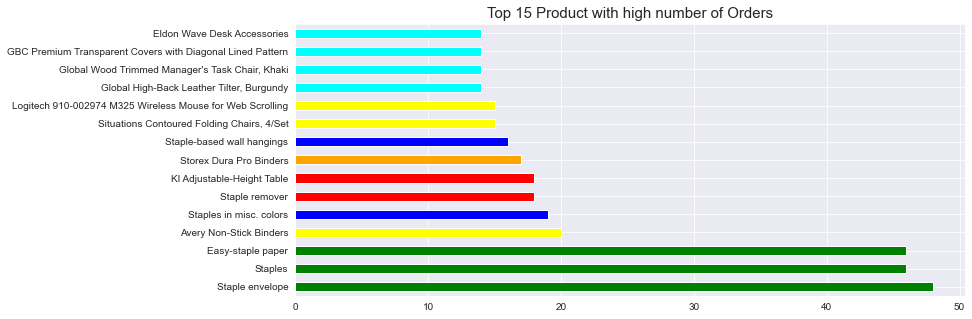

In [11]:
plt.figure(figsize=figsize)
color = ['green', 'green', 'green', 'yellow', 'blue', 'red', 'red', 'orange', 'blue', 'yellow', 'yellow', 'cyan', 'cyan',
         'cyan', 'cyan']
sstore['Product Name'].value_counts().sort_values(ascending=False).head(15).plot.barh(color=color)
plt.title('Top 15 Product with high number of Orders', size=15)

##### Staple envelope, Staples and Easy-staple paper are Products with and outstanding order.

### Top 10 Product with High Sales and Bottom 10 Product with Low Sales

In [12]:
# what is the Total Sales of a Product?

sstore.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10) # Top 10 product with the high sales

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

In [13]:
# Bottom 10 with the low sales
sstore.groupby('Product Name')['Sales'].sum().sort_values().head(10)

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Xerox 1989                                                          7.968
4009 Highlighters                                                   8.040
Stockwell Gold Paper Clips                                          8.096
Newell 308                                                          8.400
Name: Sales, dtype: float64

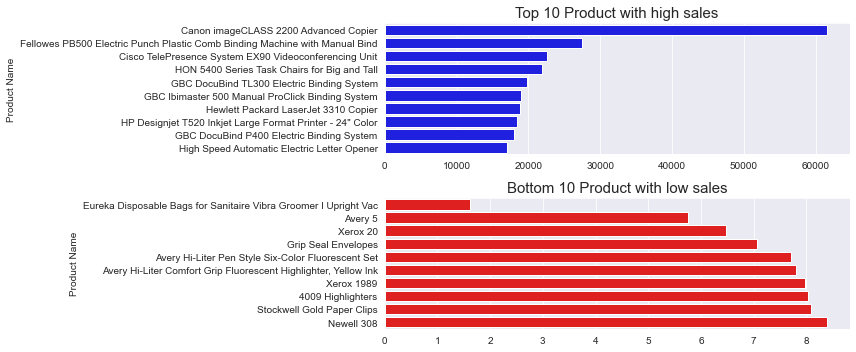

In [14]:
a = sstore.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
b = sstore.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).head(10)

plt.subplots(2, 1, figsize=figsize)
plt.subplot(211)
sns.barplot(x=a.values, y=a.index, orient='h', color='blue')
plt.title('Top 10 Product with high sales', size=15)
plt.subplot(212)
sns.barplot(x=b.values, y=b.index, orient='h', color='red')
plt.title('Bottom 10 Product with low sales', size=15)
plt.tight_layout()

#### An outstanding sales was made from the product("Canon imageCLASS 2200 Advanced Copier") and a very low sales was from the product("Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac")

### Product that is more Profitable

In [15]:
sstore.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
                                                                                  ...    
Bush Advantage Collection Racetrack Conference Table                           -1934.3976
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                       -2876.1156
Cubify CubeX 3D Printer Triple Head Print                                      -3839.9904
Lexmark MX611dhe Monochrome Laser Printer                                      -4589.9730
Cubify CubeX 3D Printer Double Head Print                                      -8879.97

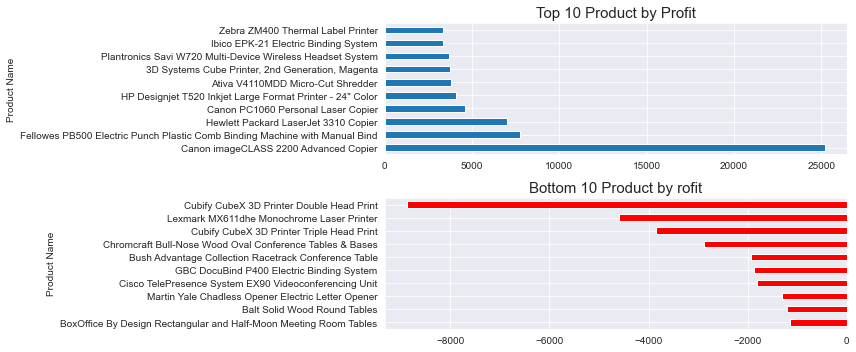

In [16]:
plt.subplots(2, 1, figsize=figsize)
plt.subplot(2, 1, 1)
sstore.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Product by Profit', size=15)
plt.subplot(2, 1, 2)
sstore.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).tail(10).plot.barh(color='red')
plt.title('Bottom 10 Product by rofit', size=15)
plt.tight_layout()

### Quantity of Product

In [17]:
sstore.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64

### Product with the highest discount

In [18]:
sstore.groupby('Product Name')['Discount'].sum().sort_values(ascending=False).head(10)

Product Name
Storex Dura Pro Binders                                           7.2
Avery Non-Stick Binders                                           6.8
GBC Instant Report Kit                                            6.4
Avery Self-Adhesive Photo Pockets for Polaroid Photos             5.9
GBC Standard Recycled Report Covers, Clear Plastic Sheets         5.9
Premier Elliptical Ring Binder, Black                             5.8
GBC Standard Therm-A-Bind Covers                                  5.8
Acco D-Ring Binder w/DublLock                                     5.6
GBC Premium Transparent Covers with Diagonal Lined Pattern        5.6
Pressboard Covers with Storage Hooks, 9 1/2" x 11", Light Blue    5.4
Name: Discount, dtype: float64

In [19]:
sstore.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

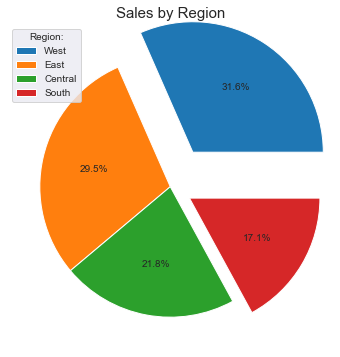

In [20]:
plt.figure(figsize=(12, 6))
sstore.groupby('Region')['Sales'].sum().sort_values(ascending=False).plot.pie(subplots=True, autopct="%1.1f%%",
                                                ylabel='', label=True, labeldistance=None, explode=[0.316, 0, 0, 0.171])
plt.title('Sales by Region', size=15)
plt.legend(loc="upper left", title='Region:')

#### West as the high sales and South as the low sales

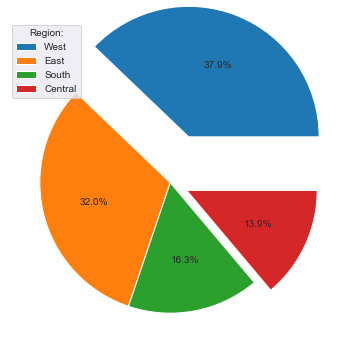

In [21]:
plt.figure(figsize=(12, 6))
sstore.groupby('Region')['Profit'].sum().sort_values(ascending=False).plot.pie(subplots=True, autopct="%1.1f%%",
                                                ylabel='', label=True, labeldistance=None,  explode=[0.379, 0, 0, 0.139])
plt.legend(title='Region:', loc="upper left")
plt.show()

#### high profit from the west and low profit are from the Central

In [22]:
sstore.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [23]:
sstore.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

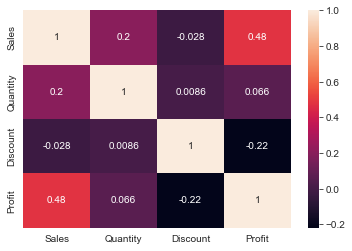

In [24]:
sns.heatmap(sstore.corr(), annot=True)

#### Negative Correlation between the Discount and Profit - when Discount is high Profit is low and when Discount is low Profit is high

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

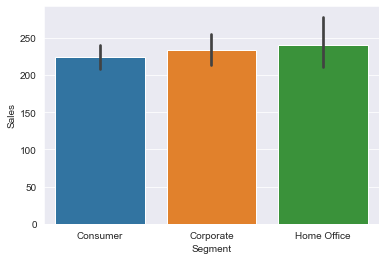

In [25]:
sns.barplot(x=sstore['Segment'], y=sstore['Sales'], data=sstore)

In [26]:
sstore.groupby('Segment')['Sales'].mean().sort_values(ascending=False)

Segment
Home Office    240.972041
Corporate      233.823300
Consumer       223.733644
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

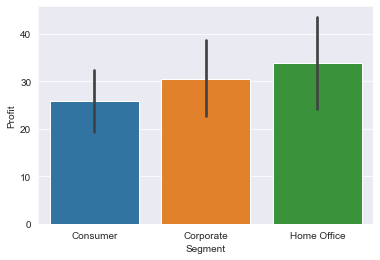

In [27]:
sns.barplot(x=sstore['Segment'], y=sstore['Profit'], data=sstore)

In [28]:
sstore.groupby('Segment')['Profit'].mean().sort_values(ascending=False)

Segment
Home Office    33.818664
Corporate      30.456667
Consumer       25.836873
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

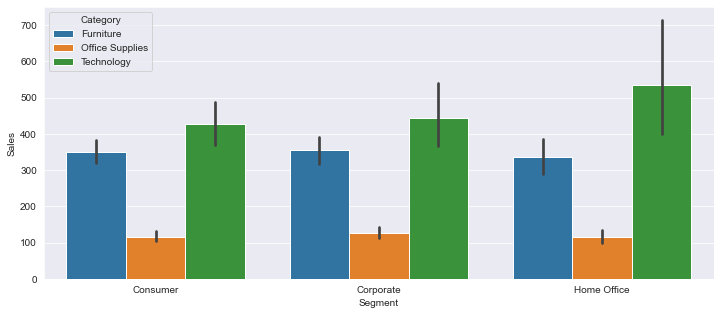

In [29]:
plt.figure(figsize=figsize)
sns.barplot(x=sstore['Segment'], y=sstore['Sales'], data=sstore, hue='Category')

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

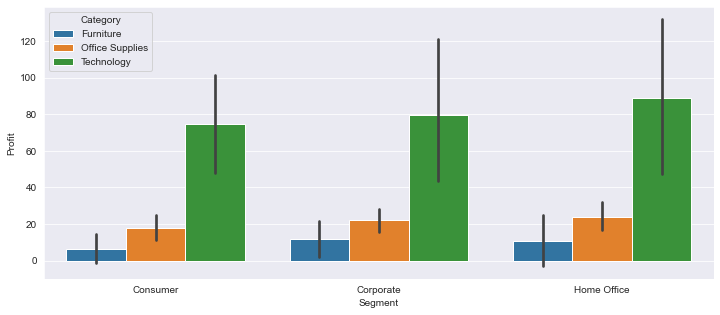

In [30]:
plt.figure(figsize=figsize)
sns.barplot(x=sstore['Segment'], y=sstore['Profit'], data=sstore, hue='Category')

<AxesSubplot:xlabel='Segment', ylabel='Discount'>

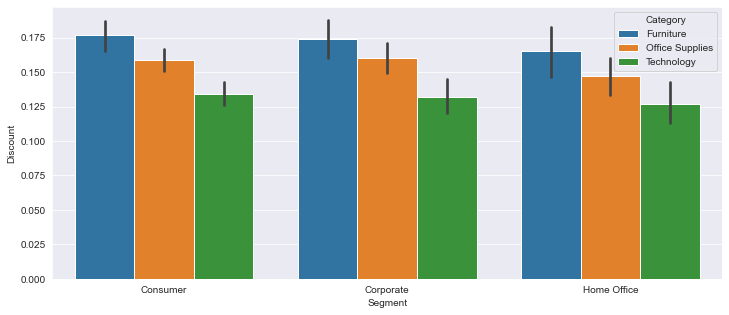

In [37]:
plt.figure(figsize=figsize)
sns.barplot(x=sstore['Segment'], y=sstore['Discount'], data=sstore, hue='Category')

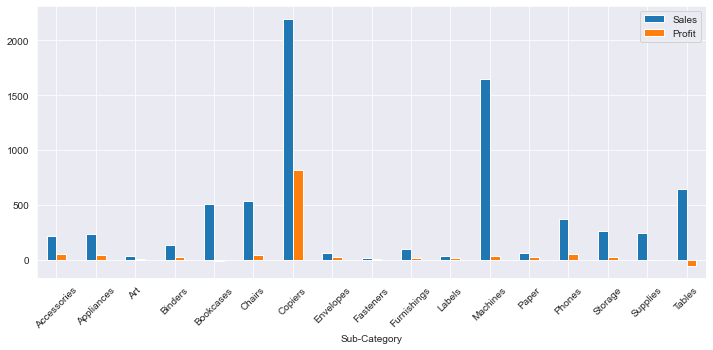

In [41]:
sstore.groupby('Sub-Category')[['Sales', 'Profit']].mean().plot.bar(figsize=figsize)
plt.xticks(rotation=45)
plt.show()

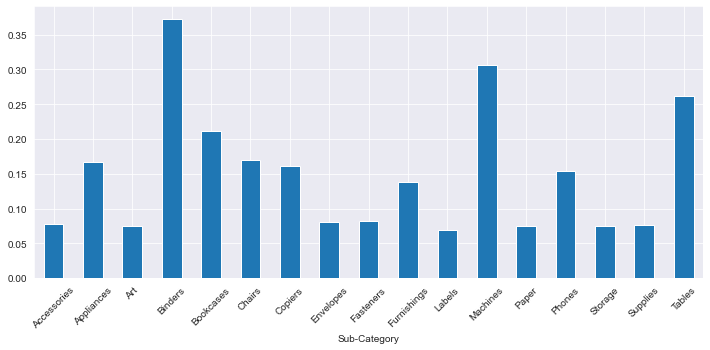

In [36]:
sstore.groupby('Sub-Category')['Discount'].mean().plot.bar(figsize=figsize)
plt.xticks(rotation=45)
plt.show()

### Highest Sales and Profit are from  Copiers
#### Observation: Copiers has high profit and Sales because the discount is low, unlike Binders which has hgh discount and also Machine with high discount but the Sales is high.

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

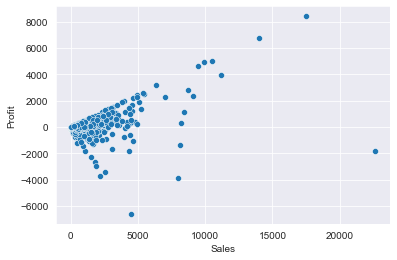

In [32]:
sns.scatterplot(x='Sales', y='Profit', data=sstore)

#### As Sales Increases, Profit Increases

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

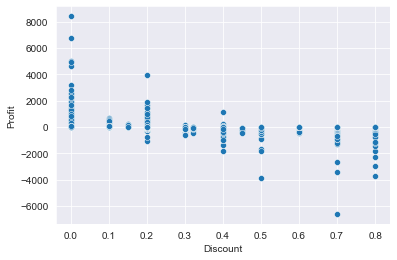

In [33]:
sns.scatterplot(x='Discount', y='Profit', data=sstore)

#### As Discount Increases Profit decreases